## Pymaceuticals

In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Raw data file(s)
csv_file = ["Resources/mouse_drug_data.csv", "Resources/clinicaltrial_data.csv"]

# Read data file(s) and store into data frame(s)
clinical_trial_data = pd.read_csv(csv_file[0])
mouse_drug_data = pd.read_csv(csv_file[1])

In [2]:
# Clean/Prepare the data
clinical_trial_drug_all = pd.merge(clinical_trial_data, mouse_drug_data)
clinical_trial_drug_data = clinical_trial_drug_all[(clinical_trial_drug_all["Drug"] == 'Capomulin') |
                                                   (clinical_trial_drug_all["Drug"] == 'Infubinol') |
                                                   (clinical_trial_drug_all["Drug"] == 'Ketapril')  |
                                                   (clinical_trial_drug_all["Drug"] == 'Placebo')]

clinical_trial_drug_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


### Treatment Response: Volume Changes

In [3]:
drug_names = clinical_trial_drug_data.loc[:,["Drug"]]
drug_names = drug_names.drop_duplicates().unstack().values

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume_mean = pd.DataFrame(clinical_trial_drug_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
tumor_volume_mean = tumor_volume_mean.unstack(level = 0)
tumor_volume_mean.columns = tumor_volume_mean.columns.get_level_values(1)
tumor_volume_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = pd.DataFrame(clinical_trial_drug_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
tumor_volume_sem = tumor_volume_sem.unstack(level=0)
tumor_volume_sem.columns = tumor_volume_sem.columns.get_level_values(1)
tumor_volume_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


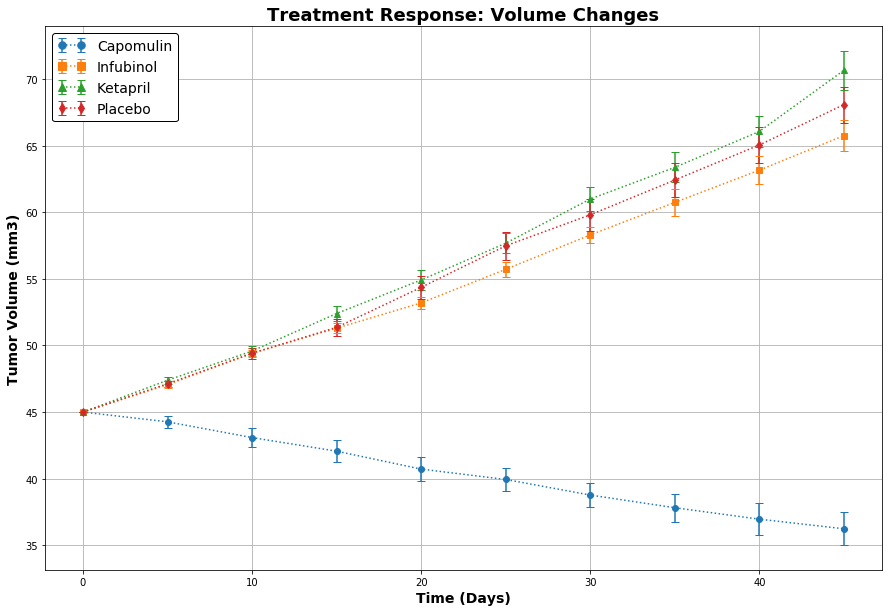

In [6]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.title("Treatment Response: Volume Changes",fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Tumor Volume (mm3)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Time (Days)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.grid(True)

# markers used throughout 
markers = ['o', 's', '^', 'd']

# timepoints
x_axis = tumor_volume_mean.index

# count the markers
count = 0

# plot each volume column with standard error
for c in tumor_volume_mean.columns:
    plt.errorbar(x_axis, 
                 tumor_volume_mean[c], 
                 tumor_volume_sem[c],
                 linestyle = ':', 
                 marker =  markers[count], 
                 capthick = 1,
                 capsize = 4)
    count += 1

# Legend
lg = plt.legend(numpoints = 2,
                frameon = True, 
                markerscale = 1.25, 
                edgecolor = 'black', 
                fontsize = '14', 
                framealpha = 1)

plt.savefig("Resources/Treatment.Response.Volume.Changes.png")
plt.show()

### Treatment Response: Metastatic Changes

In [7]:
# Metastatic Data - averages
tumor_spread_mean = pd.DataFrame(clinical_trial_drug_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])
tumor_spread_mean = tumor_spread_mean.unstack(level=0)
tumor_spread_mean.columns = tumor_spread_mean.columns.get_level_values(level=1)
tumor_spread_mean

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [8]:
# Metastatic Data - standard error
tumor_spread_sem = pd.DataFrame(clinical_trial_drug_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
tumor_spread_sem = tumor_spread_sem.unstack(level = 0)
tumor_spread_sem.columns = tumor_spread_sem.columns.get_level_values(level = 1)
tumor_spread_sem

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


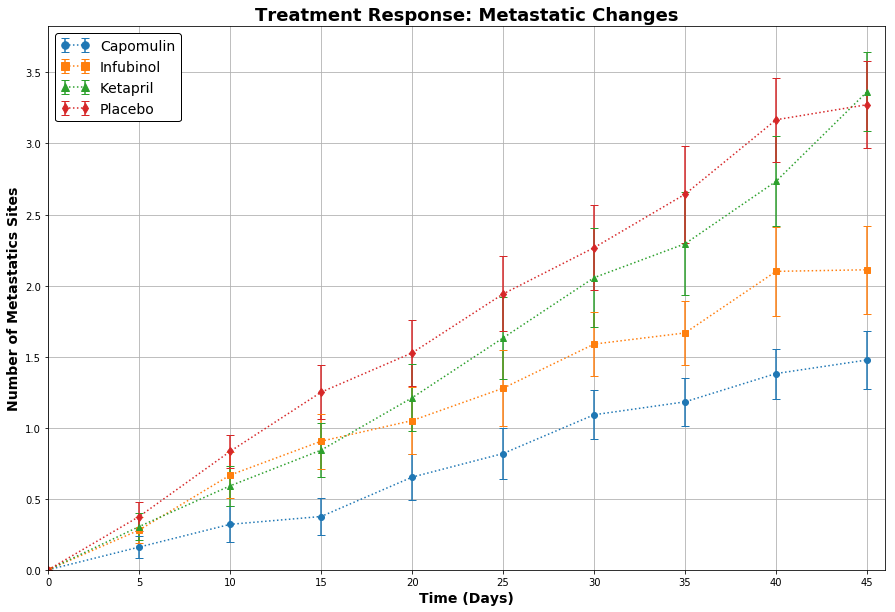

In [9]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (15,10))
plt.title("Treatment Response: Metastatic Changes",fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Number of Metastatics Sites", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Time (Days)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(np.arange(0,tumor_spread_mean.index.max() + 3 ,5))
plt.xlim(0, tumor_spread_mean.index.max()+1)
plt.ylim(0, tumor_spread_mean.max().max() + tumor_spread_sem.max().max() + .1)
plt.grid(True)

# timepoints
x_axis = tumor_spread_mean.index

# count the markers
count = 0

# plot each volume column with standard error
for c in tumor_volume_mean.columns:
    plt.errorbar(x_axis, 
                 tumor_spread_mean[c], 
                 tumor_spread_sem[c],
                 linestyle = ':', 
                 marker =  markers[count], 
                 capthick = 1,
                 capsize = 4)
    count += 1

# Legend
lg = plt.legend(numpoints = 2,
                frameon = True, 
                markerscale = 1.25, 
                edgecolor = 'black', 
                fontsize = '14', 
                framealpha = 1)

plt.savefig("Resources/Treatment.Response.Metastatic.Changes.png")
plt.show()

### Treatment Survival Rate

In [10]:
# Survival Rate -- how many mice made it
mice_count = clinical_trial_drug_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
mice_count = mice_count.unstack(level = 0)
mice_count

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


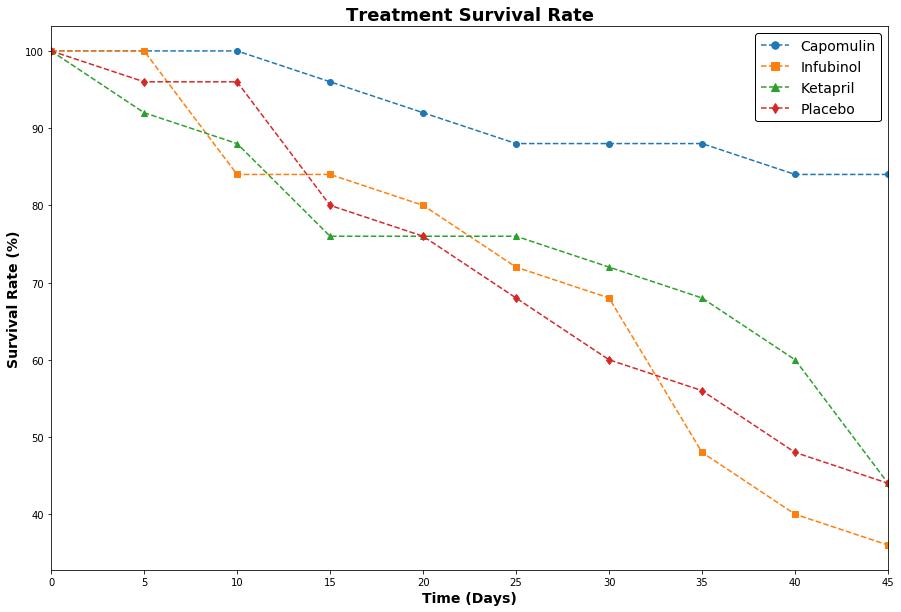

In [11]:
# Generate the Plot
plt.figure(figsize = (15,10))
plt.title("Treatment Survival Rate",fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Survival Rate (%)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Time (Days)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xlim(0, mice_count.index.max())

# timepoints
x_axis = mice_count.index

# count the markers
count = 0 

for c in mice_count:
    y_axis = mice_count[c]/mice_count.loc[0,c] * 100 #calculates survival rate for each timepoint
    plt.plot(x_axis, 
             y_axis, 
             linestyle = '--', 
             marker =  markers[count])
    count += 1

# Legend
lg = plt.legend(numpoints = 1,
                frameon = True, 
                markerscale = 1.25, 
                edgecolor = 'black', 
                fontsize = '14', 
                framealpha = 1)

plt.savefig("Resources/Treatment.Survival.Rate.png")
plt.show()

### Summary of Treatments by Volume

In [12]:
tumor_change = (tumor_volume_mean.loc[45, :] - tumor_volume_mean.loc[0, :])/tumor_volume_mean.loc[0, :] * 100
tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

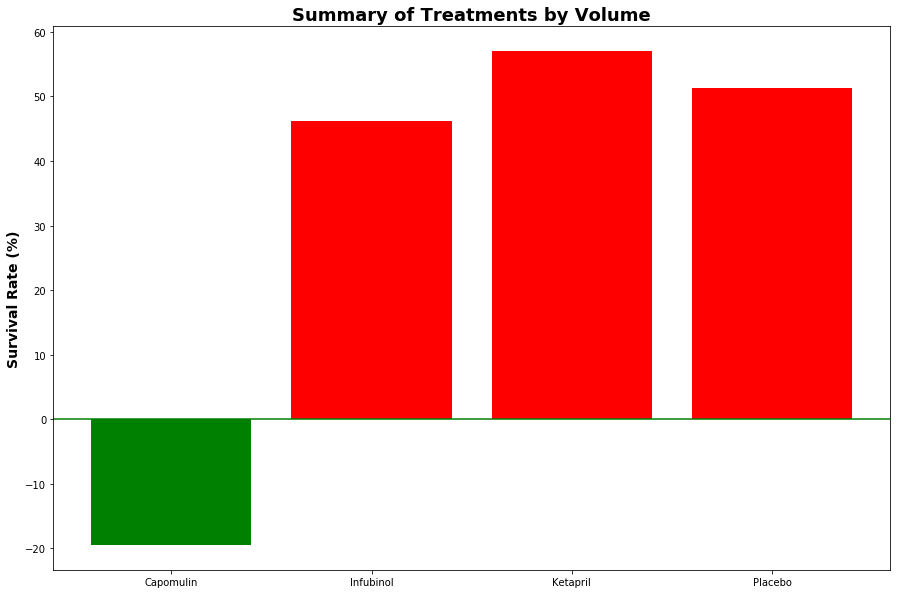

In [13]:
# Generate the Plot
x_labels = tumor_change.index

plt.figure(figsize = (15,10))
plt.title("Summary of Treatments by Volume",fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Survival Rate (%)", fontdict = {'fontsize': 14, 'fontweight': 'bold'})
plt.xticks(np.arange(len(x_labels)), x_labels)
plt.axhline(y=0, color = 'green')

plt.bar(np.arange(4), 
        tumor_change, 
        color = ['red' if tumor_change[r] > 0 else 'green' for r in np.arange(len(x_labels))])

plt.savefig("Resources/Treatment.Summary.png")
plt.show()

### Observable Trends
>Over the trial, Capomulin would be the recommend drug for treatment as it had the highest rate of survival lowest mestatic response and the most effective response to treatment.

>Oddly, the drug Ketapril and the Placebo show the same statistics in all three categories. It is a possible conclusion that both drugs share similar components. The surival rates are comparable to the placebo at the end of the treatment.

>Infubinal would be the worst.  This group, however, experienced the lowest surival rates of the two other treatments and the placebo.     